# REMOÇÃO DE FUNDO

A Remoção de fundo é um código relativamente simples para que apenas uma parte desejada da imagem seja mantida.

In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

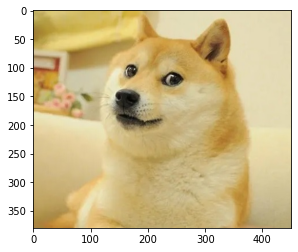

In [20]:
image_bgr = cv2.imread('doge_fundo.jpg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

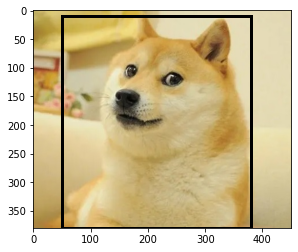

In [21]:
fig, ax = plt.subplots()

rectX = 50
rectY = 10
rectW = 330
rectH = 370

retangulo = (rectX, rectY, rectW, rectH)
plt.imshow(image_rgb)
ax = plt.gca()
rect = plt.Rectangle((rectX, rectY),rectW,rectH,linewidth=3,edgecolor='black',facecolor='none')

ax.add_patch(rect)

(<matplotlib.image.AxesImage at 0x1d59995ff10>, (-0.5, 449.5, 349.5, -0.5))

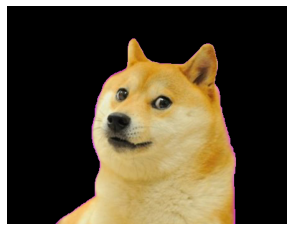

In [32]:
mascara = np.zeros(image_rgb.shape[:2], np.uint8)

fundoModelo = np.zeros((1, 65), np.float64)
frenteModelo = np.zeros((1, 65), np.float64)

cv2.grabCut(image_rgb,
            mascara, 
            retangulo,
            fundoModelo,
            frenteModelo,
            20,
            cv2.GC_INIT_WITH_RECT)

mask_2 = np.where((mascara==2) | (mascara==0), 0, 1).astype('uint8')


image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]

plt.imshow(image_rgb_nobg), plt.axis("off")

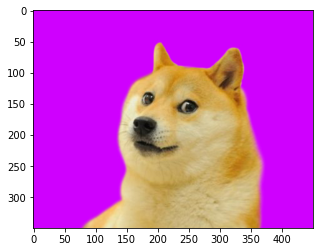

In [33]:
image_bgr = cv2.imread('doge.jpg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

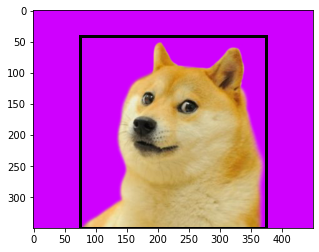

In [34]:
fig, ax = plt.subplots()

rectX = 75
rectY = 40
rectW = 300
rectH = 310

retangulo = (rectX, rectY, rectW, rectH)
plt.imshow(image_rgb)
ax = plt.gca()
rect = plt.Rectangle((rectX, rectY),rectW,rectH,linewidth=3,edgecolor='black',facecolor='none')

ax.add_patch(rect)

(<matplotlib.image.AxesImage at 0x1d59aa7a550>, (-0.5, 449.5, 349.5, -0.5))

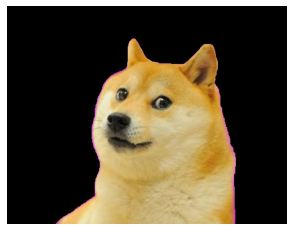

In [35]:
mascara = np.zeros(image_rgb.shape[:2], np.uint8)

fundoModelo = np.zeros((1, 65), np.float64)
frenteModelo = np.zeros((1, 65), np.float64)

cv2.grabCut(image_rgb,
            mascara, 
            retangulo,
            fundoModelo,
            frenteModelo,
            20,
            cv2.GC_INIT_WITH_RECT)

mask_2 = np.where((mascara==2) | (mascara==0), 0, 1).astype('uint8')


image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]

plt.imshow(image_rgb_nobg), plt.axis("off")

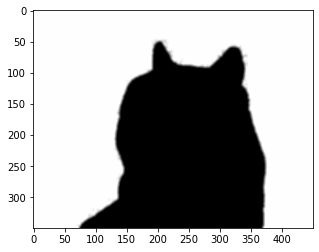

In [36]:
mascara_acima_limiar = image_rgb > 253 
mascara = image_rgb * mascara_acima_limiar
mascara = mascara[:,:,2]
blur = cv2.GaussianBlur(mascara, (5,5), 6)
plt.imshow(blur, cmap='gray')

In [37]:
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

x,y,w,h = cv2.boundingRect(thresh)
print(x)
print(y)
print(w)
print(h)

retangulo = (x, y, w, h)

75
50
299
300


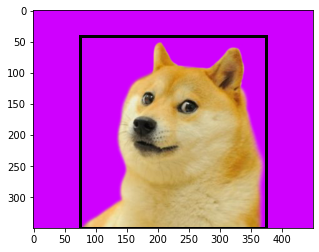

In [38]:
plt.imshow(image_rgb)
ax = plt.gca()
rect = plt.Rectangle((rectX, rectY),rectW,rectH,linewidth=3,edgecolor='black',facecolor='none')

ax.add_patch(rect)

(<matplotlib.image.AxesImage at 0x1d59abacfa0>, (-0.5, 449.5, 349.5, -0.5))

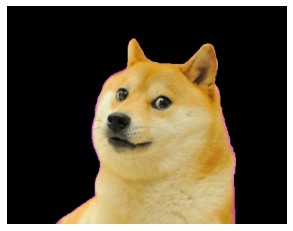

In [39]:
mascara = np.zeros(mascara.shape[:2], np.uint8)

fundoModelo = np.zeros((1, 65), np.float64)
frenteModelo = np.zeros((1, 65), np.float64)

cv2.grabCut(image_rgb,
            mascara, 
            retangulo,
            fundoModelo,
            frenteModelo,
            60,
            cv2.GC_INIT_WITH_RECT)

mask_2 = np.where((mascara==2) | (mascara==0), 0, 1).astype('uint8')


image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]

plt.imshow(image_rgb_nobg), plt.axis("off")